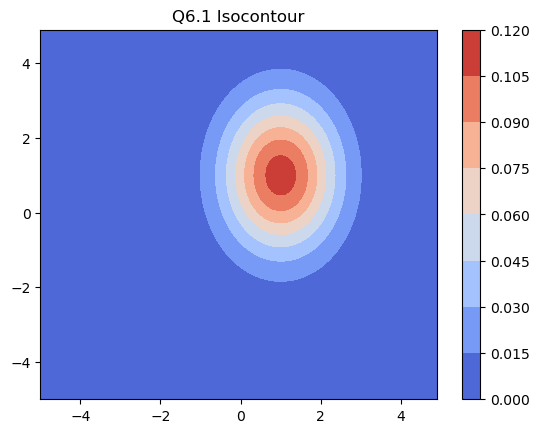

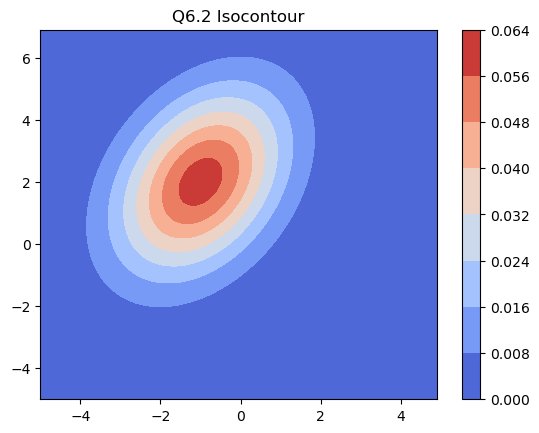

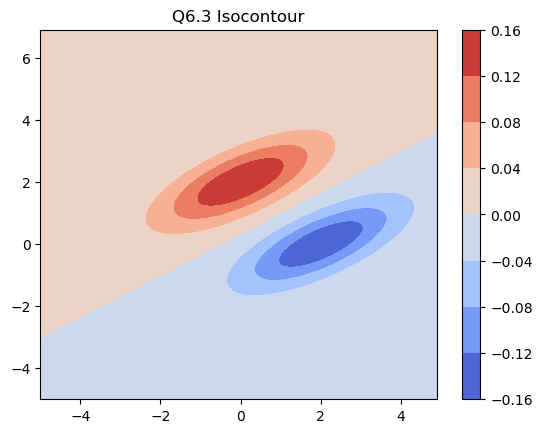

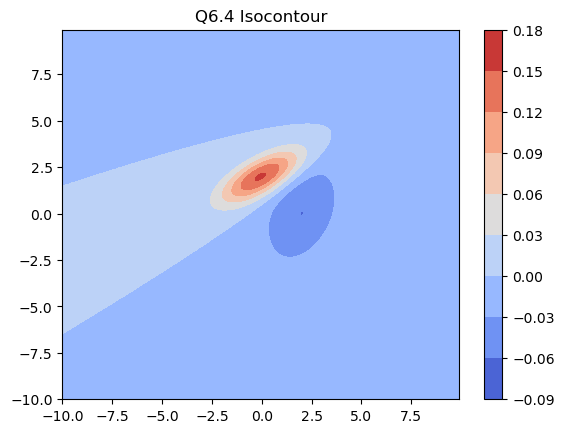

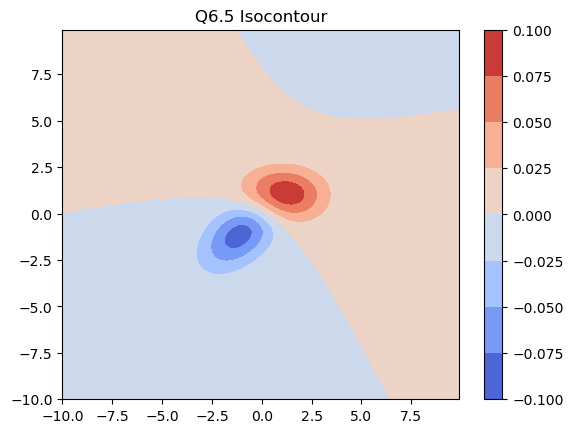

In [95]:
#Q6.1
import numpy as np
import random
random.seed(7)
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x, y = np.mgrid[-5:5:.1, -5:5:.1]
rv = multivariate_normal([1, 1], [[1, 0], [0, 2]])
data = np.dstack((x, y))
z = rv.pdf(data)
cs = plt.contourf(x, y, z, cmap='coolwarm')
cbar = plt.colorbar(cs) 
plt.title("Q6.1 Isocontour")
plt.show()

#6.2
x, y = np.mgrid[-5:5:.1, -5:7:.1]
rv = multivariate_normal([-1, 2], [[2, 1], [1, 4]])
data = np.dstack((x, y))
z = rv.pdf(data)
cs = plt.contourf(x, y, z, cmap='coolwarm')
cbar = plt.colorbar(cs) 
plt.title("Q6.2 Isocontour")
plt.show()

#6.3
x, y = np.mgrid[-5:5:.1, -5:7:.1]
rv1 = multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = multivariate_normal([2, 0], [[2, 1], [1, 1]])
data = np.dstack((x, y))
z = rv1.pdf(data) - rv2.pdf(data)
cs = plt.contourf(x, y, z, cmap='coolwarm')
cbar = plt.colorbar(cs) 
plt.title("Q6.3 Isocontour")
plt.show()


#6.4
x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv1 = multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = multivariate_normal([2, 0], [[2, 1], [1, 4]])
data = np.dstack((x, y))
z = rv1.pdf(data) - rv2.pdf(data)
cs = plt.contourf(x, y, z, cmap='coolwarm')
cbar = plt.colorbar(cs) 
plt.title("Q6.4 Isocontour")
plt.show()

#6.5
x, y = np.mgrid[-10:10:.1, -10:10:.1]
rv1 = multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = multivariate_normal([-1, -1], [[2, 1], [1, 2]])
data = np.dstack((x, y))
z = rv1.pdf(data) - rv2.pdf(data)
cs = plt.contourf(x, y, z, cmap='coolwarm')
cbar = plt.colorbar(cs) 
plt.title("Q6.5 Isocontour")
plt.show()

mean of X_1 is  3.2870715686328875
mean of X_2 is  4.314106775107674

Covariance Matrix:
[[7.19261655 0.69289814]
 [0.69289814 3.85156826]]

eigenvalues:  [7.33061632 3.71356849]
eigen-vectors:  [[ 0.98073819 -0.1953269 ]
 [ 0.1953269   0.98073819]]



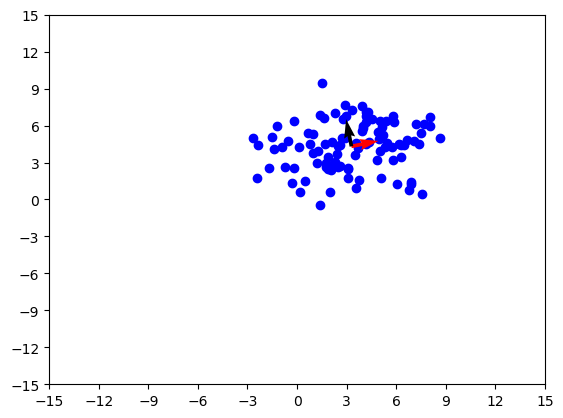

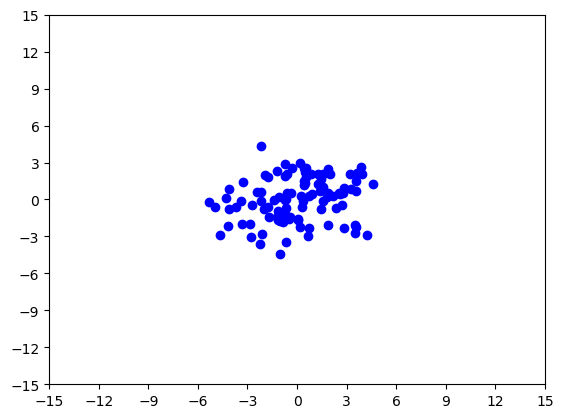

In [97]:
#7
from scipy.stats import multivariate_normal
from numpy import linalg as LA
from sklearn.preprocessing import normalize




X_1 = np.random.normal(3, 3, 100)
X_2 = np.random.normal(4, 2, 100)

data = np.stack((X_1, X_2), axis = -1)

#print(data)

#7.1

print("mean of X_1 is ", np.mean(X_1))
print("mean of X_2 is ", np.mean(X_2))
print()
#7.2
#demeaned?
X_1_demeaned = X_1 - np.mean(X_1)
X_2_demeaned = X_2 - np.mean(X_2)

data_demeaned = np.stack((X_1_demeaned, X_2_demeaned), axis = -1)
Covariance_matrix = np.cov(np.transpose(data))

print("Covariance Matrix:")
print(Covariance_matrix)
print()

#7.3
eigenvalues, eigenvectors = LA.eig(Covariance_matrix)
print("eigenvalues: ", eigenvalues)
print("eigen-vectors: ", eigenvectors)
print()

#7.4
plt.scatter(X_1, X_2, c ="blue")
eig_vec1 = eigenvalues[0] * eigenvectors[:,0]
eig_vec2 = eigenvalues[1] * eigenvectors[:,1]
plt.quiver(np.mean(X_1), np.mean(X_2), *eig_vec1, color=['r'])
plt.quiver(np.mean(X_1), np.mean(X_2), *eig_vec2, color=['black'])
plt.xticks(np.arange(-15, 16, 3))
plt.yticks(np.arange(-15, 16, 3))
plt.show()

#7.5
normalized_eigenvectors  = normalize(eigenvectors, axis=1, norm='l1')
#print(normalized_eigenvectors)
U = np.transpose(normalized_eigenvectors)
#print(U)
U_T = np.transpose(U_T)



X_roateted = np.dot(U_T, np.transpose(data_demeaned))
plt.scatter(X_roateted[0], X_roateted[1], c ="blue")
plt.xticks(np.arange(-15, 16, 3))
plt.yticks(np.arange(-15, 16, 3))
plt.show()



In [47]:
training_number = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

from numpy.linalg import inv
from scipy.stats import multivariate_normal

def splitList(portion1, portion2, a_List):
    total = portion1 + portion2
    length = len(a_List)
    num = int(portion1 * length / total)
    return np.array(a_List[:num]), np.array(a_List[num:])

def accuracy_score(labels, predictions, length):
    score = 0
    for i in range(length):
        if (labels[i] == predictions[i]):
            score += 1
            #print("test")
    return score / length

def pooled_withtn_class_variance_matrix (i, training_data, training_labels, length, size):
    
    pooled_withtn_class_variance = [[0] * size] * size
    for i in range(10):
        #print("This is class ", i)
        indexList = np.where(training_labels == i)
        mean_class_i, covariance_class_i = Guassian_Distribution_By_Class(i, training_data, training_labels, length, size)
        #print("This class has %4d elements" % (len(indexList[0])))
        covariance_class_i *= len(indexList[0])
        covariance_class_i /= length
        pooled_withtn_class_variance += covariance_class_i

    return pooled_withtn_class_variance
    
def calculate_rate(labels, predictions, length, data_number):
    rate = [0]*10
    for i in range(length):
        if (labels[i] == predictions[i]):
            rate[labels[i]] += 1
    for i in range(10):
        #print(rate[i])
        #print(data_number[i])
        rate[i] /= data_number[i]
        
    #print(rate)
    return rate

In [40]:
import sys
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam"]:
        data = np.load(f"data/{data_name}-data-hw3.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 32)
training_data (4171, 32)
training_labels (4171,)


In [41]:


data = np.load(f"data/mnist-data-hw3.npz")
minst_test_data = data["test_data"]
minst_training_data = data["training_data"]
minst_training_labels = data["training_labels"]


data = np.load(f"data/mnist-data-hw3.npz")
spam_test_data = data["test_data"]
spam_training_data = data["training_data"]
spam_training_labels = data["training_labels"]



#print (spam_training_labels)

In [90]:
#Q8.1


def Guassian_Distribution_By_Class (i, training_data, training_labels, length, size):

    #Computing Mean
    mean_vector = [0] * 784
    class_matrix_flat = []
    indexList = np.where(training_labels[0:length] == i)
    #print(np.shape(indexList))
    #print(minst_training_data(indexList[0]))
    for index in (indexList[0]):
        #print(np.shape(minst_training_data[index].flatten()))
        mean_vector = np.add(mean_vector, training_data[index].flatten())  
        class_matrix_flat.append(training_data[index].flatten())
    mean_vector = mean_vector / len(indexList[0])
    #print(class_matrix_flat[0])
    #print(np.shape(class_matrix_flat))
    #print(np.shape(mean_vector))
    class_matrix_flat -= mean_vector
    """
    test = 0
    for i in range (784):
        test += class_matrix_flat[i][0]
    print (test/784)
    """
    #Computing Covariance Matrix   
    cov_matrix = np.cov(np.transpose(class_matrix_flat))
    #print(np.shape(cov_matrix))

    #Guassian_Distribution?
    
    return mean_vector, cov_matrix
    
'''
mean_class1 = find_mean_by_class (1)
print(mean_class1)
'''

'\nmean_class1 = find_mean_by_class (1)\nprint(mean_class1)\n'

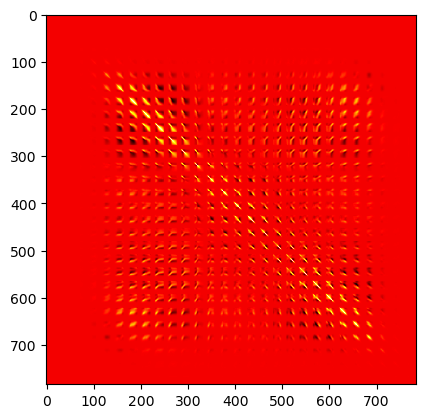

In [91]:
#Q8
mean_class1, cov_matrix_class1 = Guassian_Distribution_By_Class (5, minst_training_data, minst_training_labels, 60000, 784)

plt.imshow(cov_matrix_class1, cmap='hot', interpolation='nearest')
plt.show()

#3(b)

In [44]:
#Shuffle
data = np.load(f"data/mnist-data-hw3.npz")
combinedList = list(zip(data["training_data"], data["training_labels"]))
test_data_minst_Kaggle = data["test_data"]
random.shuffle(combinedList)
training_data_minst, training_labels_minst_orig = zip(*combinedList)
training_set_minst, validation_set_minst = splitList(5,1, training_data_minst)
training_labels_minst, validation_labels_minst = splitList(5,1, training_labels_minst_orig)


Training Length:   100, Accuracy Score 0.613700
Training Length:   200, Accuracy Score 0.621600
Training Length:   500, Accuracy Score 0.321400
Training Length:  1000, Accuracy Score 0.656900
Training Length:  2000, Accuracy Score 0.772700
Training Length:  5000, Accuracy Score 0.838900
Training Length: 10000, Accuracy Score 0.854900
Training Length: 30000, Accuracy Score 0.866500
Training Length: 50000, Accuracy Score 0.870700


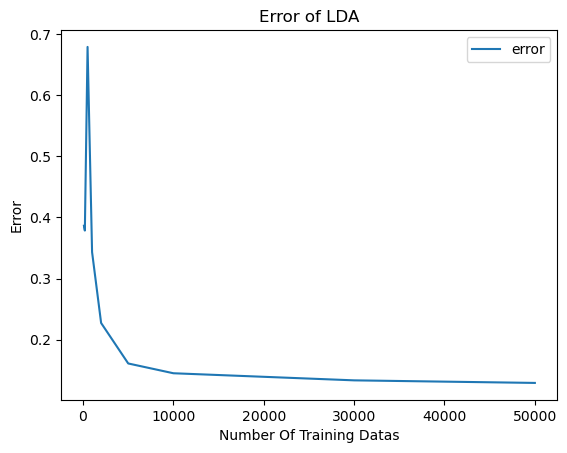

In [93]:
#Q8.3(a)

from scipy.stats import multivariate_normal
from numpy import linalg as LA

accuracy_rate_by_class_LDA = []
training_number = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

def Multi_Class_LDA (length, training_set, training_labels, validation_set, validation_labels, size):

    data_number_by_class = []
    for i in range(10):
        validation_index = np.where(validation_labels == i)
        data_number_by_class.append(len(validation_index[0]))

    errors = []
    for training_len in length: 
        mu_sigma_hat_by_class = []
        prediction_validation = []
        mean_by_class = []
        prior_by_class = []
        for i in range(10):
            indexList = np.where(training_labels[0:training_len] == i)
            prior_by_class.append(len(indexList[0]) / training_len)
            LDA_variance_matrix = pooled_withtn_class_variance_matrix(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            non_singular_LDA_variance_matrix = LDA_variance_matrix + np.identity(size) * 1e-07
            mean_class_i, covariance_class_i = Guassian_Distribution_By_Class(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            mean_by_class.append(mean_class_i)
            sigma_inverse_hat = np.linalg.solve(non_singular_LDA_variance_matrix, np.identity(size))
            mu_sigma_hat = np.dot(np.transpose(mean_class_i), sigma_inverse_hat)
            mu_sigma_hat_by_class.append(mu_sigma_hat)
            #print(np.shape(mu_sigma_hat))
        
        prediction_validation = []
        for data in validation_set:
            flat_data = data.flatten() 
            scores = []
            predict_class = 0 
            for j in range(10):
                #score = multivariate_normal.logpdf(flat_data, mean_by_class[j], non_singular_LDA_variance_matrix, True) + np.log(prior_by_class[j])
                score = np.dot(mu_sigma_hat_by_class[j], flat_data) - np.dot(mu_sigma_hat_by_class[j], mean_by_class[j]) / 2 + np.log(prior_by_class[j])
                scores.append(score)
                
            highest_score = scores[0]
            for i in range(len(scores)):
                if scores[i] > highest_score:
                    highest_score = scores[i]
                    predict_class = i

            prediction_validation.append(predict_class)

        
            
        accuracy_rate = calculate_rate(validation_labels, prediction_validation, len(validation_labels), data_number_by_class)
        accuracy_rate_by_class_LDA.append(accuracy_rate)
        
        #print(training_len)
        error = 1 - accuracy_score(validation_labels, prediction_validation, len(validation_labels))
        print("Training Length: %5d, Accuracy Score %5f" %(training_len, accuracy_score(validation_labels, prediction_validation, len(validation_labels))))
        errors.append(error)
    
    plt.plot(training_number, errors, label = "error")
    plt.title("Error of LDA")
    plt.xlabel("Number Of Training Datas")
    plt.ylabel("Error")
    plt.legend()    
    plt.show()
    # print(accuracy_rate_by_class_LDA)

    

            

Multi_Class_LDA(training_number, training_set_minst, training_labels_minst, validation_set_minst, validation_labels_minst, 784)

Training Length:   100, Accuracy Score 0.701900
Training Length:   200, Accuracy Score 0.812000
Training Length:   500, Accuracy Score 0.891000
Training Length:  1000, Accuracy Score 0.916500
Training Length:  2000, Accuracy Score 0.871900
Training Length:  5000, Accuracy Score 0.576500
Training Length: 10000, Accuracy Score 0.775000
Training Length: 30000, Accuracy Score 0.774000
Training Length: 50000, Accuracy Score 0.763300


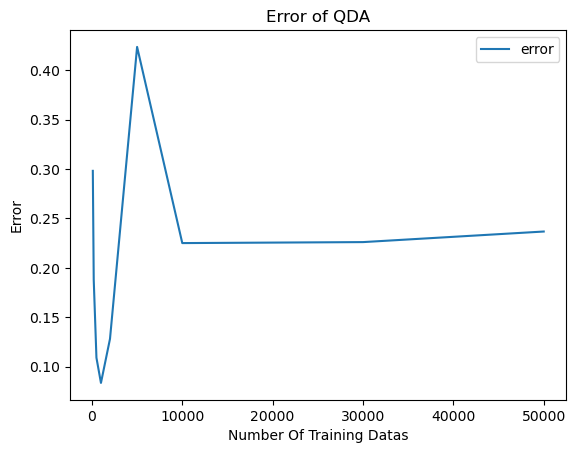

In [92]:
#8.3(b)
from scipy.stats import multivariate_normal
from numpy import linalg as LA
from scipy.stats import multivariate_normal


training_number = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
accuracy_rate_by_class_QDA = []




def Multi_Class_QDA (length, training_set, training_labels, validation_set, validation_labels, size):
    
    data_number_by_class = []
    for i in range(10):
        validation_index = np.where(validation_labels == i)
        data_number_by_class.append(len(validation_index[0]))

    
    errors = []
    
    for training_len in length: 
        #print("length: ", training_len)
        prediction_validation = []
        covariance_matrix_by_class = []
        sigma_inverse_hat_by_class = []
        mean_by_class = []
        prior_by_class = []
        for i in range(10):
            indexList = np.where(training_labels[0:training_len] == i)
            prior_by_class.append(len(indexList[0]) / training_len)
            mean_class_i, covariance_class_QDA = Guassian_Distribution_By_Class(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            mean_by_class.append(mean_class_i)
            non_singular_QDA_variance_matrix = covariance_class_QDA + np.identity(size) * 0.5e-03
            covariance_matrix_by_class.append(non_singular_QDA_variance_matrix)

            #sigma_inverse_hat = np.linalg.solve(non_singular_QDA_variance_matrix, np.identity(784))
            #sigma_inverse_hat_by_class.append(sigma_inverse_hat)
            

        flatten_data = []
        prediction_validation = []
        for data in validation_set:
            flat_data = data.flatten() 
            flatten_data.append(flat_data)

        #print(np.shape(flatten_data))
        scores = []
        for j in range(10):
            #print(j)
            score = multivariate_normal.logpdf(flatten_data, mean = mean_by_class[j], cov = covariance_matrix_by_class[j], allow_singular = True) + np.log(prior_by_class[j])
            #f = flat_data - mean_by_class[j]
            #score = -1/2 * np.dot(np.dot(np.transpose(f), sigma_inverse_hat_by_class[j]), f) - 1/2 * np.log(np.linalg.det(covariance_matrix_by_class[j])) + np.log(prior_by_class[j])
            scores.append(score)
            #print("finished")
            
        #print(np.shape(scores))
        #print(scores[0])
        for i in range(10000):
            predict_class = 0 
            highest_score = scores[0][i]
            for j in range(10):            
                if scores[j][i] > highest_score:
                    highest_score = scores[j][i]
                    predict_class = j
            prediction_validation.append(predict_class)
            #print(scores)
        #print(prediction_validation)
                
        accuracy_rate = calculate_rate(validation_labels, prediction_validation, len(validation_labels), data_number_by_class)
        accuracy_rate_by_class_QDA.append(accuracy_rate)
        #print(np.shape(prediction_validation))
        #print(training_len)
        error = 1 - accuracy_score(validation_labels, prediction_validation, len(validation_labels))
        print("Training Length: %5d, Accuracy Score %5f" %(training_len, accuracy_score(validation_labels, prediction_validation, len(validation_labels))))
        errors.append(error)
    
    plt.plot(training_number, errors, label = "error")
    plt.title("Error of QDA")
    plt.xlabel("Number Of Training Datas")
    plt.ylabel("Error")
    plt.legend()    
    plt.show()


Multi_Class_QDA(training_number, training_set_minst, training_labels_minst, validation_set_minst, validation_labels_minst, 784) 

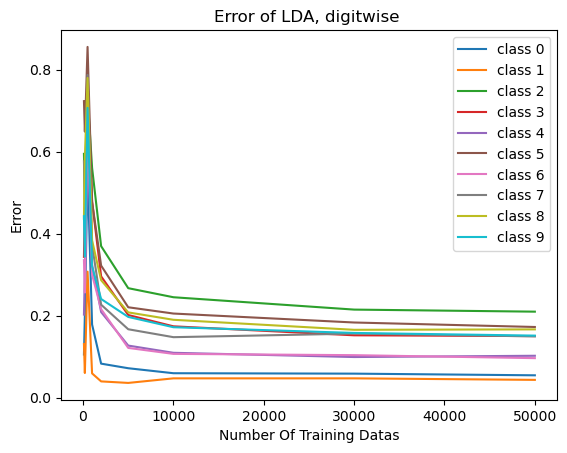

In [57]:
#8.3(d)


accuracy_rate_by_class_LDA_T = np.transpose(accuracy_rate_by_class_LDA)

plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[0], label = "class 0")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[1], label = "class 1")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[2], label = "class 2")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[3], label = "class 3")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[4], label = "class 4")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[5], label = "class 5")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[6], label = "class 6")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[7], label = "class 7")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[8], label = "class 8")
plt.plot(training_number, 1 - accuracy_rate_by_class_LDA_T[9], label = "class 9")

plt.title("Error of LDA, digitwise ")
plt.xlabel("Number Of Training Datas")
plt.ylabel("Error")
plt.legend()  
plt.show()


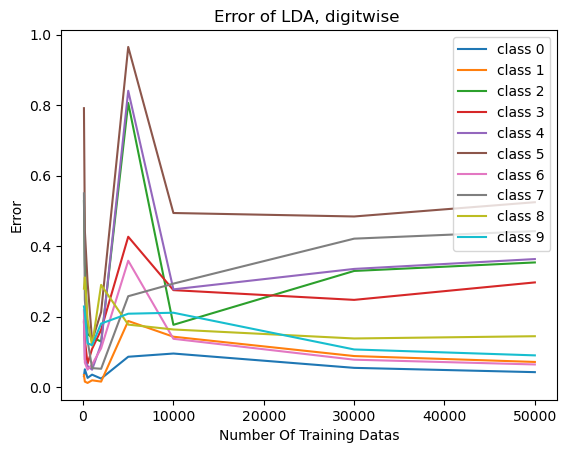

In [58]:
accuracy_rate_by_class_QDA_T = np.transpose(accuracy_rate_by_class_QDA)

plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[0], label = "class 0")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[1], label = "class 1")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[2], label = "class 2")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[3], label = "class 3")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[4], label = "class 4")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[5], label = "class 5")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[6], label = "class 6")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[7], label = "class 7")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[8], label = "class 8")
plt.plot(training_number, 1 - accuracy_rate_by_class_QDA_T[9], label = "class 9")

plt.title("Error of LDA, digitwise ")
plt.xlabel("Number Of Training Datas")
plt.ylabel("Error")
plt.legend()  
plt.show()

In [73]:
#8.4
def array_to_csv (arr, filename):
    with open(filename, 'w') as file:
        file.write("Id,Category\n")
        for i, v in enumerate(arr):
            file.write(f'{i +1}, {v}\n')


from scipy.stats import multivariate_normal
from numpy import linalg as LA


training_number = [50000]

def Multi_Class_LDA_Kaggle (length, training_set, training_labels, validation_set, size):

    errors = []
    for training_len in length: 
        mu_sigma_hat_by_class = []
        prediction_validation = []
        mean_by_class = []
        prior_by_class = []
        for i in range(10):
            indexList = np.where(training_labels[0:training_len] == i)
            prior_by_class.append(len(indexList[0]) / training_len)
            LDA_variance_matrix = pooled_withtn_class_variance_matrix(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            non_singular_LDA_variance_matrix = LDA_variance_matrix + np.identity(size) * 1e-07
            mean_class_i, covariance_class_i = Guassian_Distribution_By_Class(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            mean_by_class.append(mean_class_i)
            sigma_inverse_hat = np.linalg.solve(non_singular_LDA_variance_matrix, np.identity(size))
            mu_sigma_hat = np.dot(np.transpose(mean_class_i), sigma_inverse_hat)
            mu_sigma_hat_by_class.append(mu_sigma_hat)
            #print(np.shape(mu_sigma_hat))
        
        prediction_validation = []
        for data in validation_set:
            flat_data = data.flatten() 
            scores = []
            predict_class = 0 
            for j in range(10):
                #score = multivariate_normal.logpdf(flat_data, mean_by_class[j], non_singular_LDA_variance_matrix, True) + np.log(prior_by_class[j])
                score = np.dot(mu_sigma_hat_by_class[j], flat_data) - np.dot(mu_sigma_hat_by_class[j], mean_by_class[j]) / 2 + np.log(prior_by_class[j])
                scores.append(score)
                
            highest_score = scores[0]
            for i in range(len(scores)):
                if scores[i] > highest_score:
                    highest_score = scores[i]
                    predict_class = i

            prediction_validation.append(predict_class)
    
    print("finish")
    return prediction_validation



    

            

Kaggle_prediction = Multi_Class_LDA_Kaggle(training_number, training_set_minst, training_labels_minst, minst_test_data, 784)

finish


In [74]:
array_to_csv(Kaggle_prediction, "minst2.csv")

In [85]:
#8.5
data = np.load(f"data/spam-data-hw3.npz")
combinedList = list(zip(data["training_data"], data["training_labels"]))
test_data_spam_Kaggle = data["test_data"]
random.shuffle(combinedList)
training_data_spam, training_labels_spam_orig = zip(*combinedList)
training_set_spam, validation_set_spam = splitList(5,1, training_data_spam)
training_labels_spam, validation_labels_spam = splitList(5,1, training_labels_spam_orig)

def Guassian_Distribution_By_Class_Kaggle (i, training_data, training_labels, length, size):

    #Computing Mean
    mean_vector = np.array([0] * size)
    class_matrix_flat = []
    indexList = np.array(np.where(training_labels[0:length] == i))
    for index in (indexList[0]):
        mean_vector = np.array(np.add(mean_vector, training_data[index]))
        class_matrix_flat.append(training_data[index])
    mean_vector = mean_vector / len(indexList[0])

    class_matrix_flat -= mean_vector
    cov_matrix = np.cov(np.transpose(class_matrix_flat))
    return mean_vector, cov_matrix

def Multi_Class_QDA_Kaggle (length, training_set, training_labels, validation_set, size):
    
    
    
    for training_len in length: 
        #print("length: ", training_len)
        prediction_validation = []
        covariance_matrix_by_class = []
        sigma_inverse_hat_by_class = []
        mean_by_class = []
        prior_by_class = []
        for i in range(2):
            indexList = np.where(training_labels[0:training_len] == i)
            prior_by_class.append(len(indexList[0]) / training_len)
            mean_class_i, covariance_class_QDA = Guassian_Distribution_By_Class_Kaggle(i, training_set[0:training_len], training_labels[0:training_len], training_len, size)
            mean_by_class.append(mean_class_i)
            non_singular_QDA_variance_matrix = covariance_class_QDA + np.identity(size) * 0.5e-03
            covariance_matrix_by_class.append(non_singular_QDA_variance_matrix)

            #sigma_inverse_hat = np.linalg.solve(non_singular_QDA_variance_matrix, np.identity(784))
            #sigma_inverse_hat_by_class.append(sigma_inverse_hat)
            



        #print(np.shape(flatten_data))
        scores = []
        for j in range(2):
            #print(j)
            score = multivariate_normal.logpdf(validation_set, mean = mean_by_class[j], cov = covariance_matrix_by_class[j], allow_singular = True) + np.log(prior_by_class[j])
            scores.append(score)
        #print(np.shape(scores))
        #print(scores[0])
        for i in range(len(validation_set)):
            predict_class = 0 
            highest_score = scores[0][i]
            for j in range(2):            
                if scores[j][i] > highest_score:
                    highest_score = scores[j][i]
                    predict_class = j
            prediction_validation.append(predict_class)
            
    print("finished")
    return prediction_validation


training_number = [len(training_labels_spam)]

Kaggle_prediction_spam = Multi_Class_QDA_Kaggle(training_number, training_set_spam, training_labels_spam, test_data_spam_Kaggle, 32)











finished


In [86]:
array_to_csv(Kaggle_prediction_spam, "spam1.csv")